In [1]:
import os
import pandas as pd
import skimage.io as io
import skimage.data
import numpy as np
import glob

## Exercise 3.1.1    Images

(900, 897, 3)


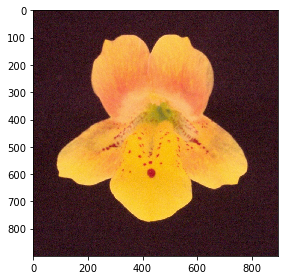

In [16]:
img = io.imread("Data/Mimulus-77.jpg")

# plot
print(img.shape)
io.imshow(img)

In [7]:
# save file in bitmap format, see: https://stackoverflow.com/questions/46385999/transform-an-image-to-a-bitmap

from PIL import Image

ary = np.array(img)

# Split the three channels
r,g,b = np.split(ary,3,axis=2)
r = r.reshape(-1)
g = r.reshape(-1)
b = r.reshape(-1)

# Standard RGB to grayscale
bitmap = list(map(lambda x: 0.299*x[0]+0.587*x[1]+0.114*x[2],
zip(r,g,b)))
bitmap = np.array(bitmap).reshape([ary.shape[0], ary.shape[1]])
bitmap = np.dot((bitmap > 128).astype(float),255)
im = Image.fromarray(bitmap.astype(np.uint8))
im.save('Data/mimulus_bw.bmp')

# --> this is just saving a map of the image not the full image

In [11]:
io.imsave(fname="Data/mimulus_c.bmp", arr=img)

**Is there a size difference between the initial JPG and the bi tmap file? Why?**
The jpg is 874,2 kB, the bmp is 2,4 MB - so the bitmap is much larger.
*Why?* - jpg is the compressed format, when loading it we decompress it and bmp saves the uncompressed version. However - the datainformation that got lost by compression can not be restored.

**Which one is better in terms of image quality?**
I think the bmp is a bit more sharp. Although I'm wondering where this extra information comes from.


## Visualize a simple image

<class 'numpy.ndarray'>
(303, 384)


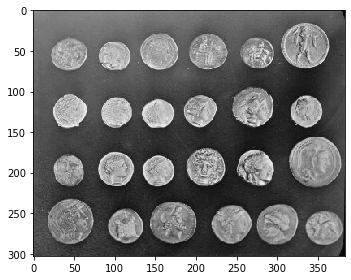

In [14]:
img_coins = skimage.data.coins()
print(type(img_coins))
print(img_coins.shape)
io.imshow(img_coins)

**How is the image from the previous exercise stored/represented in Python? What’s its data type?**
Both are a numpy.ndarray.

**What are it's dimensions?**
The Mimulus dimensions are: (900, 897, 3)
The coins dimensions are: (303, 384)

So the Mimulus has the 3ed dimension which indicates that it is in color.

### More image loading and saving exercise

In [27]:
img_coins_moodle = io.imread('Data/coins.jpg')
io.imsave(fname="Data/coins.bmp", arr=img_coins_moodle)

# Processing multiple images

In [26]:
# we're using Capsella leave data for this
# get all filenames
capsella_files = glob.glob("Data/Capsella-leaves/*.jpg")
# save all as bitmap
for file in capsella_files:
    filename = os.path.basename(file).split(".")[0] + ".bmp"
    save_file = os.path.join("Data/Capsella-leaves", filename)
    io.imsave(fname=save_file, arr=img)

In [18]:
help(glob)

Help on module glob:

NAME
    glob - Filename globbing utility.

MODULE REFERENCE
    https://docs.python.org/3.9/library/glob
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

FUNCTIONS
    escape(pathname)
        Escape all special characters.
    
    glob(pathname, *, recursive=False)
        Return a list of paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the pattern '**' will match any files and
        zero or more directories and subdirectories.
    
    ig

##  Extracting image parts
Create a new variable/image with by cutting the area from 100 to 200 in x-direction and from 150 to 250 in y-direction from the coins image.

(303, 384)


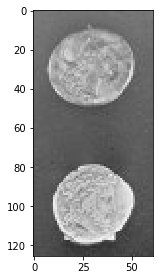

In [32]:
print(img_coins_moodle.shape)
# rows = y-axis
# columns = x-axis
img_coins_moodle_subsampled = img_coins[25:151,15:76]
io.imshow(img_coins_moodle_subsampled)

(512, 512, 4)


OSError: JPEG does not support alpha channel.

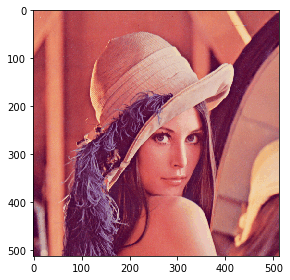

In [37]:
img_lena_gif = io.imread("Data/lena_color.gif")
print(img_lena.shape)
# print(img_lena[:5])
io.imshow(img_lena)
# this is a gif, 3 dims (so extra color), but there is a 4th value --> alpha channel --> RGBA

# transform it to gif
io.imsave("Data/lena.jpg", img_lena_gif)
img_lena_jpg = io.imread("Data/lena.jpg")
print(img_lena_jpg.shape)

In [47]:
# gif to img solution here: https://stackoverflow.com/questions/10269099/pil-convert-gif-frames-to-jpg

from PIL import Image
from PIL import GifImagePlugin
import sys

def processImage(infile, save_filename):
    try:
        im = Image.open(infile).convert('RGB')
    except IOError:
        print("Cant load", infile)
        sys.exit(1)
    i = 0

    try:
        while 1:
           # new_im = Image.new("RGB", im.size)
            im.save(save_filename + '.jpg')

            i += 1
            im.seek(im.tell() + 1)

    except EOFError:
        pass # end of sequence

processImage("Data/lena_color.gif", "lena")

In [ ]:
img_lena_noconv = Image.open("Data/lena_color.gif")
type(img_lena_noconv)

(512, 512)


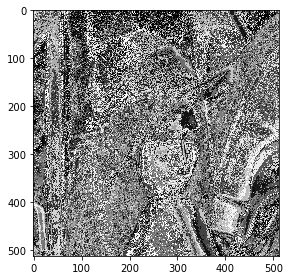

In [60]:
arr1 = np.array(img_lena_noconv)
print(arr1.shape)
io.imshow(arr1)

In [56]:
img_lena_conv = Image.open("Data/lena_color.gif").convert("RGB")
type(img_lena_conv)

PIL.Image.Image

(512, 512, 3)


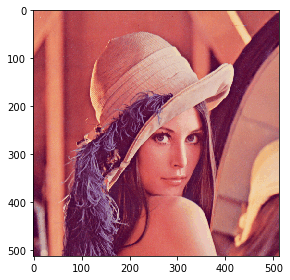

In [61]:
arr2 = np.array(img_lena_conv)
print(arr2.shape)
io.imshow(arr2)

ok interesting. Seems like when I convert a PIL.GifImage to a numpy array I just completely destroy the picture. But when I first convert it to RGB and then as numpy array to work with - everythin is as it should be.


In [62]:
io.imsave("Data/lena.jpg",arr2)

### Get the area 100:200 in x- and y-direction but only for the green channel.

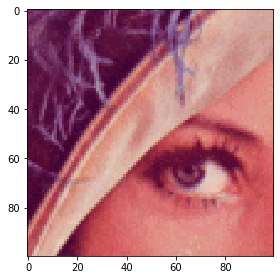

In [67]:
lena_subsampled_rgb = arr2[200:300,200:300]
io.imshow(lena_subsampled_rgb)

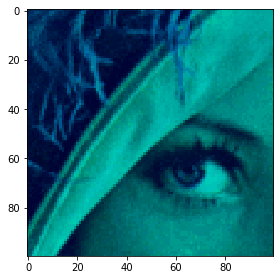

In [79]:
# make a green image
lena_subsampled_g = lena_subsampled_rgb.copy()
lena_subsampled_g[:,:,0] = 0
io.imshow(lena_subsampled_g)

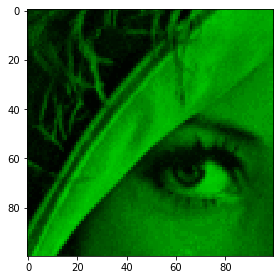

In [80]:
lena_subsampled_g[:,:,2] = 0
io.imshow(lena_subsampled_g)

I don't understand where the x,y values of the pixels are stored now.

In a 2D image; x,y correspond to row and column. But in 3D? and 4D? I'm confused. Or do I just understand the array structure wrong or smth?